# DATASET:- ALGERIAN FOREST FIRE


IMPLEMENTED BY:- TAJ HASAN MANSURI


# Linear Regression Practical implementation on ALGERIAN FOREST FIRE Dataset


Stepwise Implementation:-

1. Understanding the problem statement
2. Data Collection
3. EDA 
4. Data Cleaning
5. Pre-processing of Data
6. Model Training
7. selection of best model


# 1. Problem Statement

By using linear regression we have to predidct the temperature

# 2. Data Collection

The Dataset is collected from UIC machine learning repository 

Dataset link :

https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++
    
https://archive.ics.uci.edu/ml/machine-learning-databases/00547/
    




# Data Set Information:-

The dataset includes 244 instances that regroup a data of two regions of Algeria,

namely the Bejaia region located in the northeast of Algeria and

the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)

The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.




# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
   Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
   FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



# 2. Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing Dataset

Since data is in form of an csv file we have to use “pandas.read_csv” to load the data 

and store it in data frame as df we are setting header = 1 means row 1 ,row 0 it will ignore



In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Fetching first five rows

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Fetching last five rows

In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


# shape of data

In [6]:
df.shape

(246, 14)

observation:- 
    
    Total number of rows = 246 and
    Ttotal number of columns = 14

# Data Cleaning

After observation we have to remove unnecessory rows from dataset

In [7]:
df[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


# observation:
             Observe that row number 122 contains the NaN values and
    
             row number 123 contains the categorical values,
        
             so have to remove row 122 and 123 because it is different from the rest data.

# Removing unnecessory rows from Dataset

In [8]:
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)


In [9]:
# Checking whether both the rows were removed or or not


df.loc[120:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


# Observation:- 

sucessfully removed NaN values



# to get the data information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


# checking all the columns available in dataset.

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

# Adding new feature(column) named Region in dataset

In [12]:
#adding rows 0 ='sidi-bel abbes' Region and rows 0 ='sidi-bel abbes Region

df['Region']= 0
for i in range(len(df)):
    if i>=122:
        df['Region'][i]=1

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [14]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df['Region'].value_counts()

0    122
1    122
Name: Region, dtype: int64

Observation :- see the above bejaia is 122 and sidi-bel abbes is 122 times both are same equa

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Found that columns have extra spaces so we have to remove it

# stripping the names of the columns

In [17]:
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

# stripping the classes features column

In [19]:
df['Classes'] = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Observation:- 
    
I have got NaN value so i have to identify it and set the correct


# Checking the null values

In [20]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [21]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


# Observation:-

finally i found a NaN value in row number 165

In [22]:
df.iloc[165]

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Region               1
Name: 165, dtype: object

# Observation:-

found some mismatch position

In [23]:
# setting those mismatch positions

df.at[165,'DC'] = 14.6
df.at[165,'ISI'] = 9
df.at[165,'BUI'] = 12.5
df.at[165,'FWI'] = 10.4
df.at[165,'Classes'] = 'fire'


In [24]:
df.iloc[165]

day              14
month            07
year           2012
Temperature      37
RH               37
Ws               18
Rain            0.2
FFMC           88.9
DMC            12.9
DC             14.6
ISI               9
BUI            12.5
FWI            10.4
Classes        fire
Region            1
Name: 165, dtype: object

# Observation:-

Now the values are at their actual position in row no 165 in respect to their column

In [25]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In above dataset there is a column 'Classes' so we have to replace their value,
'not fire' = 0 and 'fire=1

In [26]:
df['Classes'] = df['Classes'].replace('not fire','0')
df['Classes'] = df['Classes'].replace('fire','1')

In [27]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,1,0
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


# observation: 

So above we can see it has been replaced the value in Classes column

# Check the null values

In [28]:
df.isnull().sum()


day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [29]:
df.isnull().sum().sum()

0

# Check the Datatype of each column 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


# Change the datatype of the column

In [31]:
df = df.astype({ 'Temperature':'int32','RH':'int32','Ws':'int32','Rain':'float64','FFMC':'float64','DMC':'float64','DC':'float64','ISI':'float64','BUI':'float64','FWI':'float64','Classes':'int32'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  Region       244 non-null    int64  
dtypes: float64(7), int32(4), int64(1), object(3)
memory usage: 24.9+ KB


Adding new feature named 'Date' by replacing unnecessary feature like
'day','month','year'


In [33]:
df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1, inplace=True)

In [34]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


# Exploring Data

Shape of Data

In [35]:
df.shape

(244, 13)

In [36]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

# To check missing value

In [37]:
df.isnull().sum().sum()

0

# Observation:-

So there is no any missing value found

# Describe using statistical analysis

In [38]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


# Univariate Analysis


The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [40]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.260932
BUI             201.686818
FWI              55.180617
Classes           0.246711
Region            0.251029
dtype: float64

# Numerical features
  
    Getting Numerical features from dataset,
    
    Creating Numerical dataframe


In [41]:
num_fea = [fea for fea in df.columns if df[fea].dtype != 'O']
print("len of numerical feature is : ",len(num_fea),", num features : ",num_fea)

len of numerical feature is :  13 , num features :  ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'date']


# Categorical feature

Creating the categorical column from dataset

In [42]:
cat_fea = [fea for fea in df.columns if df[fea].dtype == 'O']
print("len of numerical feature is : ",len(cat_fea),", num features : ",cat_fea)

len of numerical feature is :  0 , num features :  []


# Numerical Feature Analysis

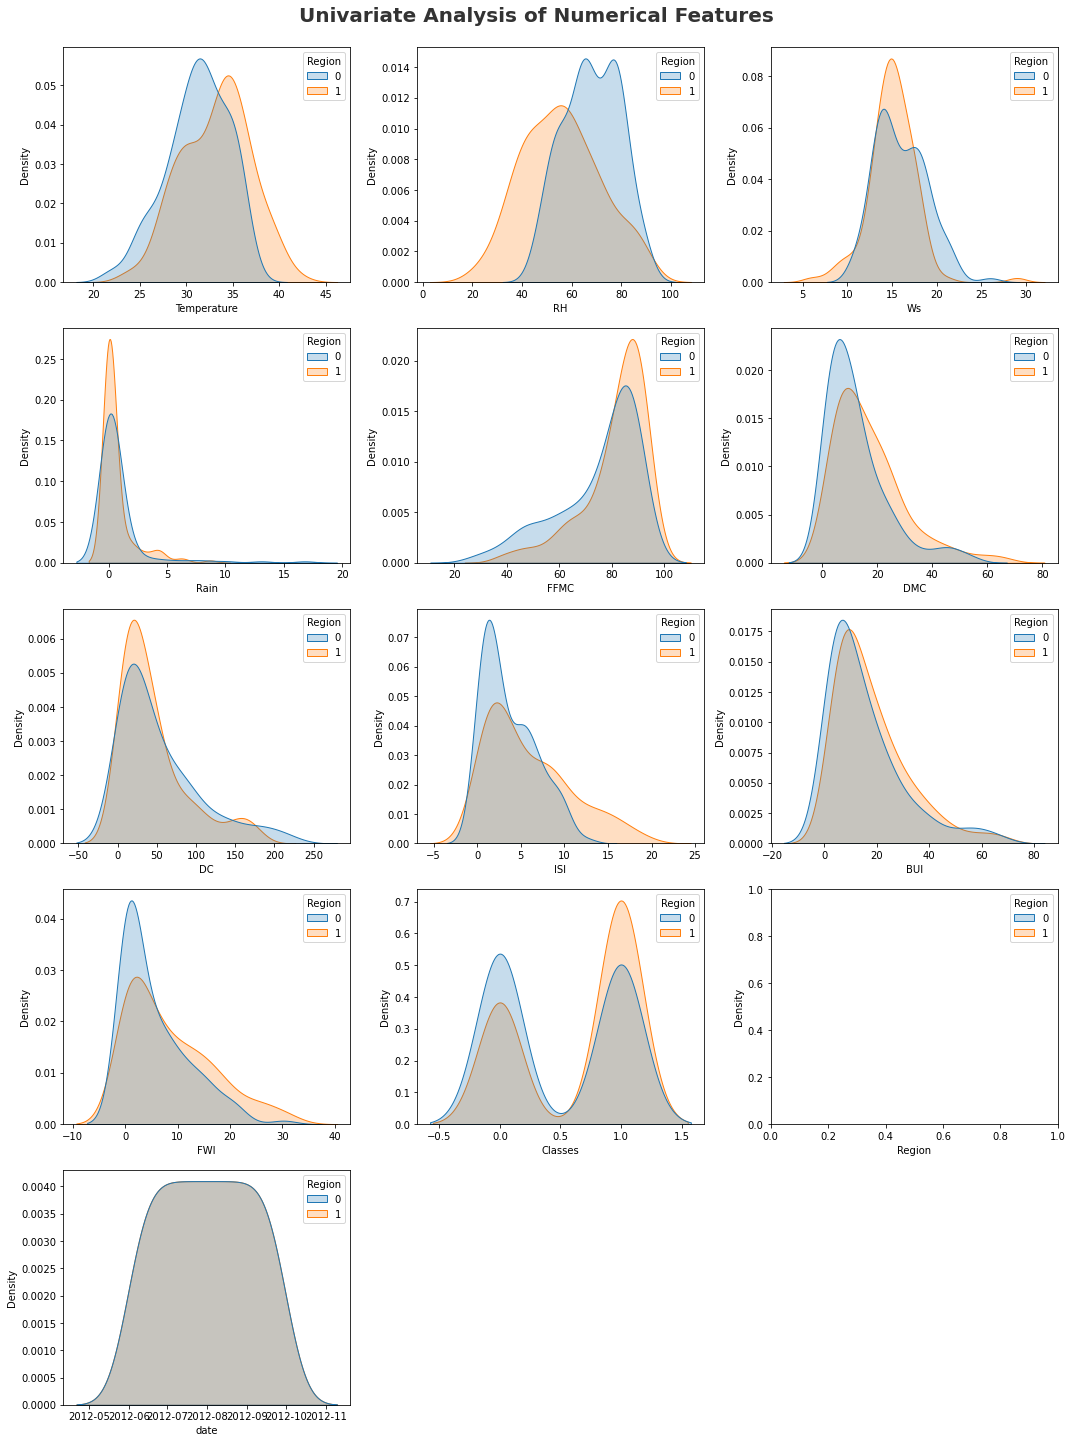

In [43]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8, y=1.) 

for i in range(0, len(num_fea)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_fea[i]],shade=True, color='b',hue='Region',data=df)
    plt.xlabel(num_fea[i])
    plt.tight_layout()


# Observation: 

1. Rain, DMC, DC, ISI, BUI,FWI these all are right skewed
2. FFMC is left skewed 
3. Temperature, RH and date are normal distribution

# Count Plot

Analysing the bivariate analysis 

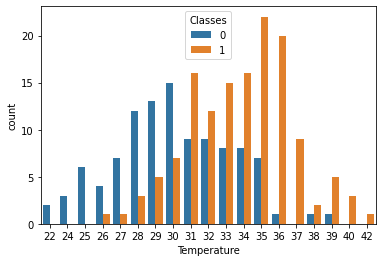

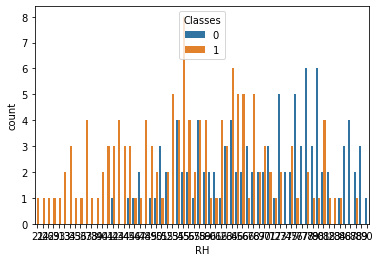

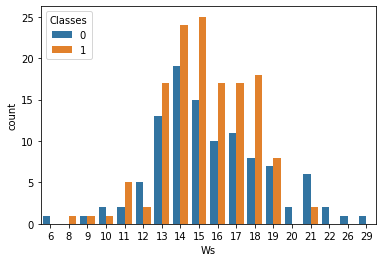

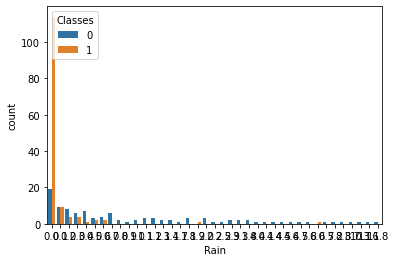

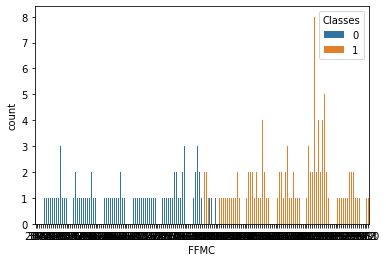

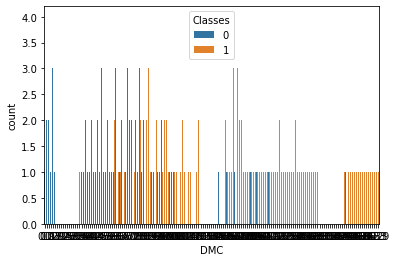

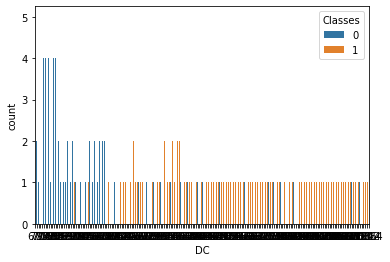

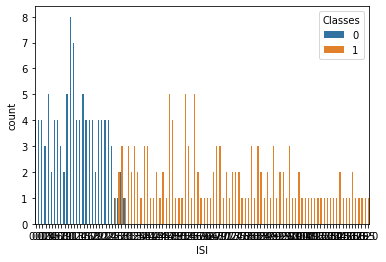

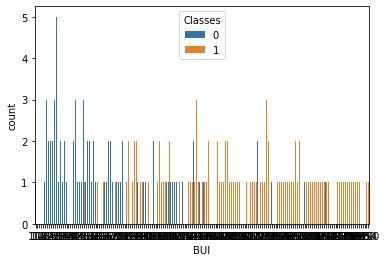

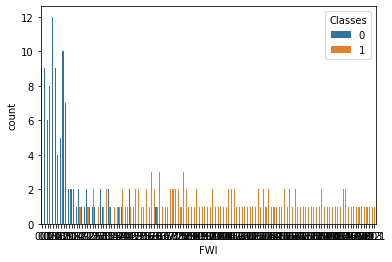

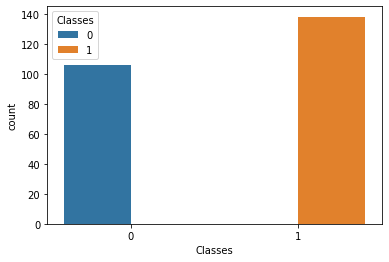

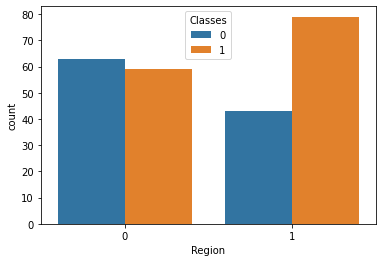

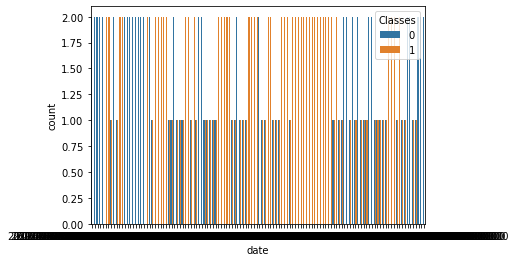

In [44]:
for fea in num_fea:
 sns.countplot(data=df,x=fea,hue='Classes')
 plt.show()

# Scatter plot to see the trends in each numeriacal columns

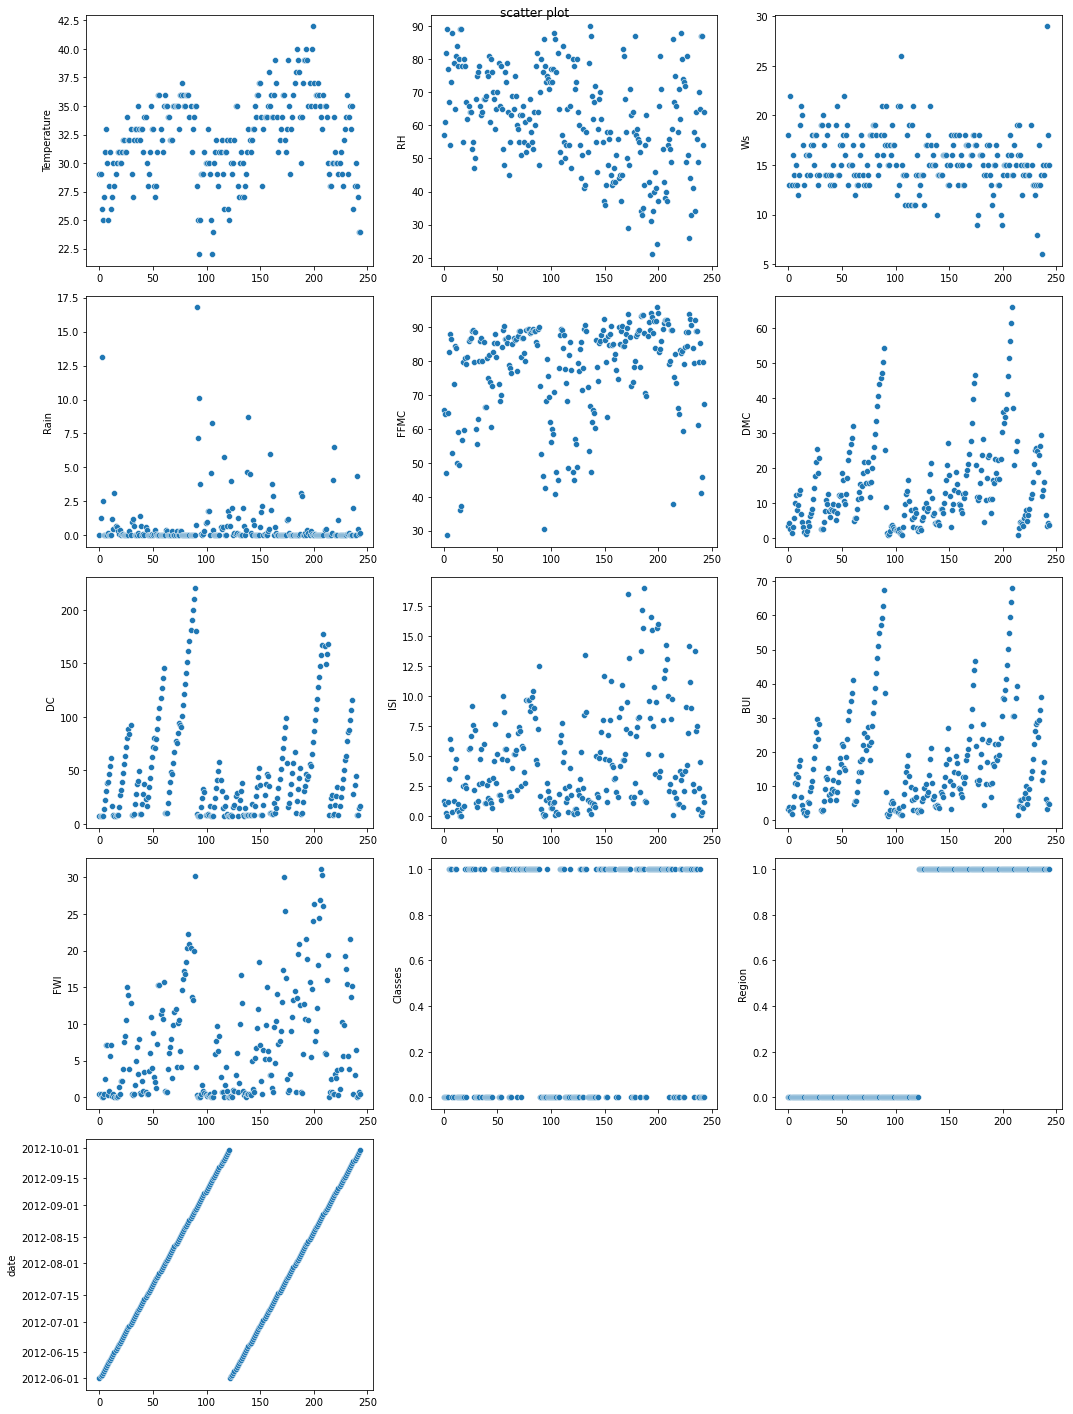

In [45]:
plt.figure(figsize=(15,20))
plt.suptitle('scatter plot ')

for i in range(0,len(num_fea)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df.index,y=num_fea[i],data=df)
    plt.tight_layout()

# Box plot


<AxesSubplot:>

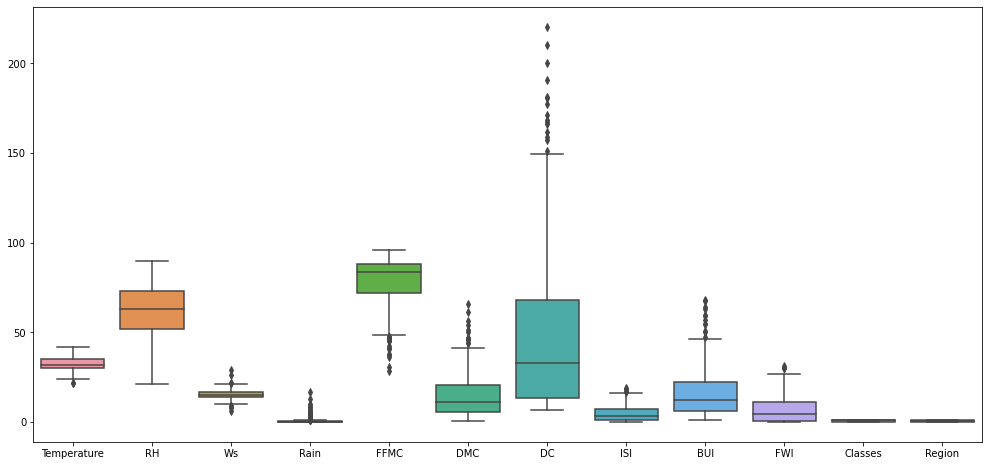

In [46]:
plt.figure(figsize = (17,8))
sns.boxplot(data = df)

# Bar Plot

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

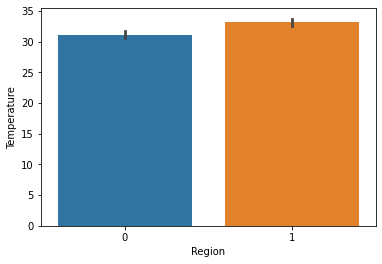

In [47]:
sns.barplot(x="Region",y='Temperature',data=df)

# Correlation visualization

In [48]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407,0.198474


# Pair plot

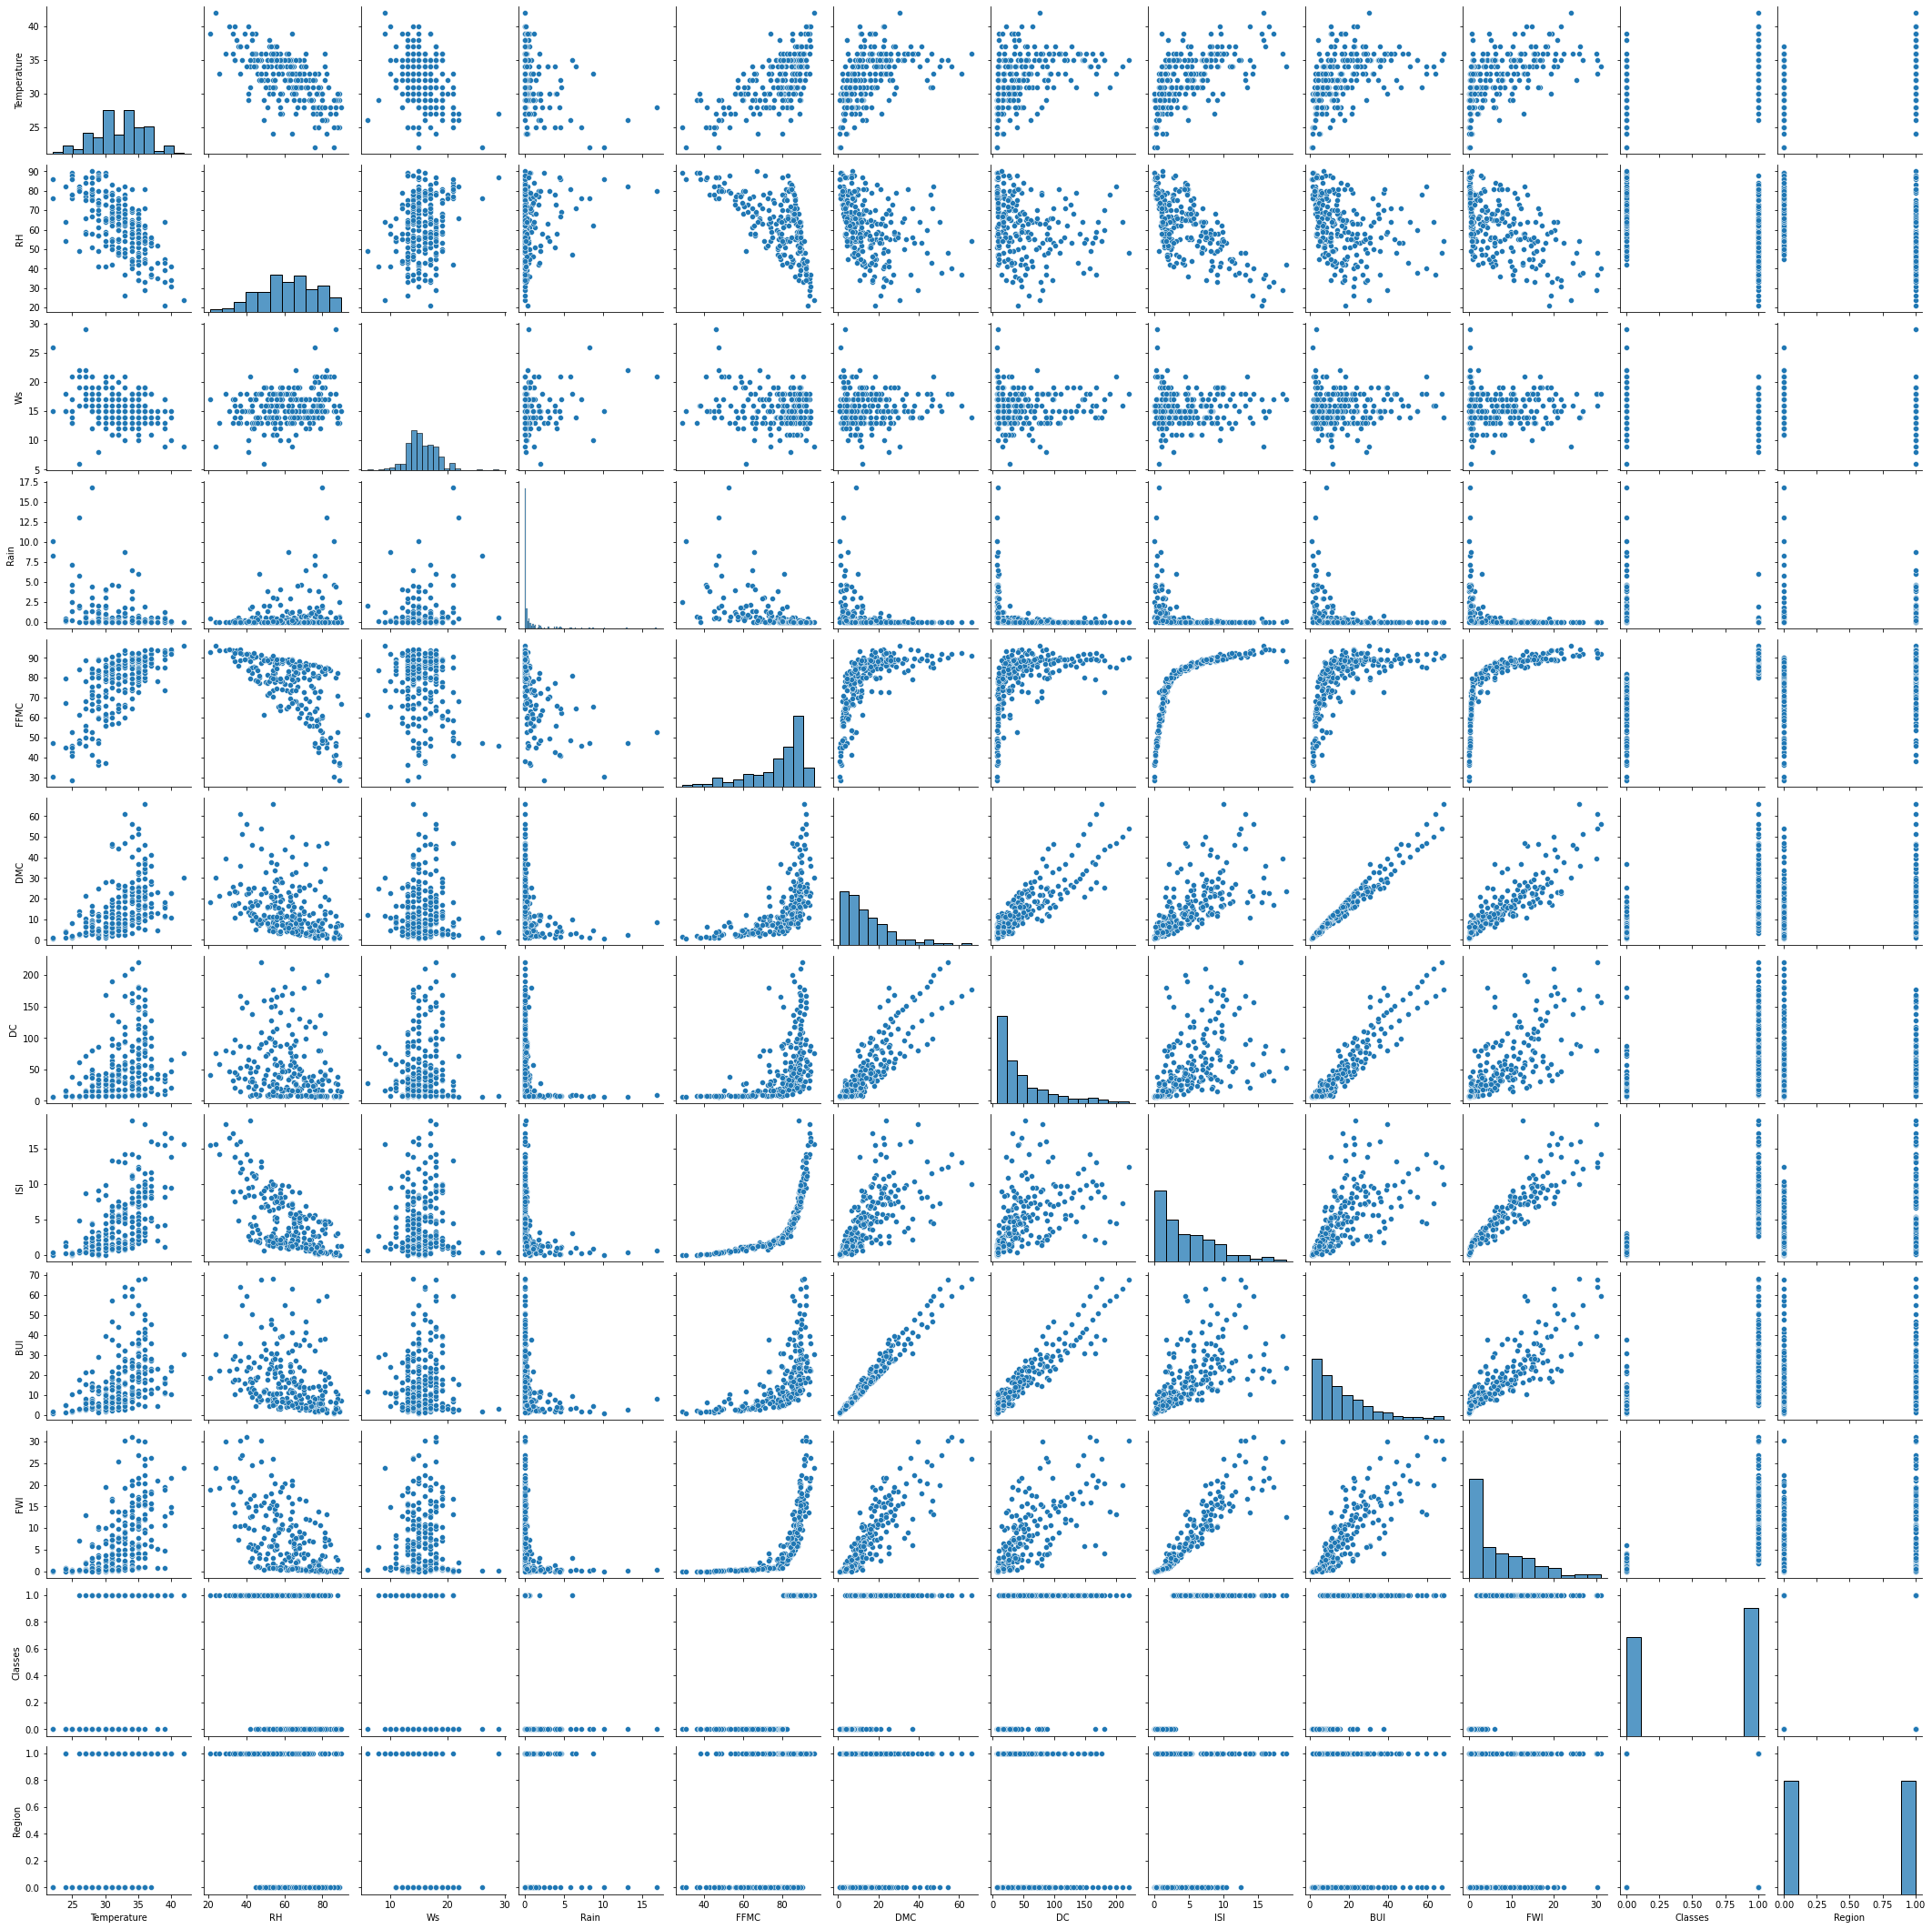

In [49]:
sns.pairplot(df)

# Heatmap

<AxesSubplot:>

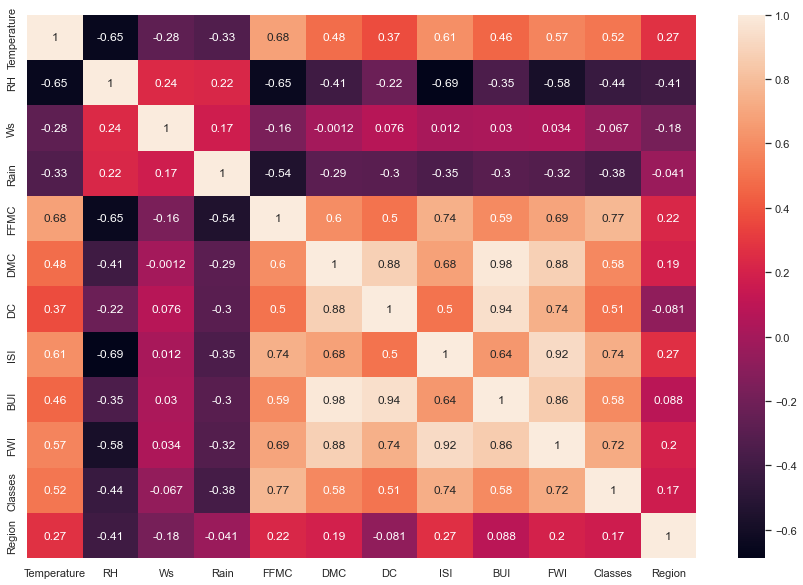

In [50]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True)

# Plot data in linear regression

# Regplot




# RH vs Temperature


<AxesSubplot:xlabel='RH', ylabel='Temperature'>

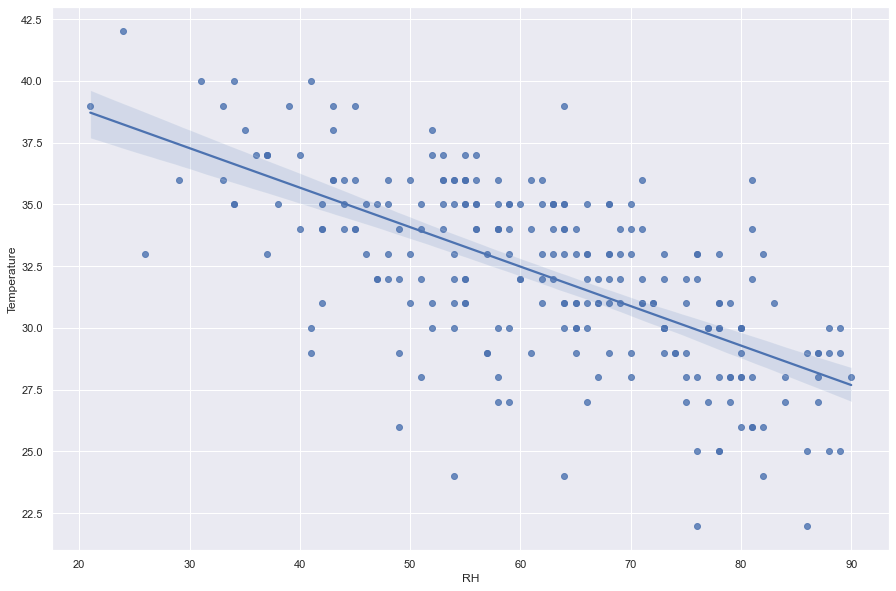

In [51]:
sns.regplot(x='RH',y='Temperature',data=df)

# WS vs Temperature

<AxesSubplot:xlabel='Ws', ylabel='Temperature'>

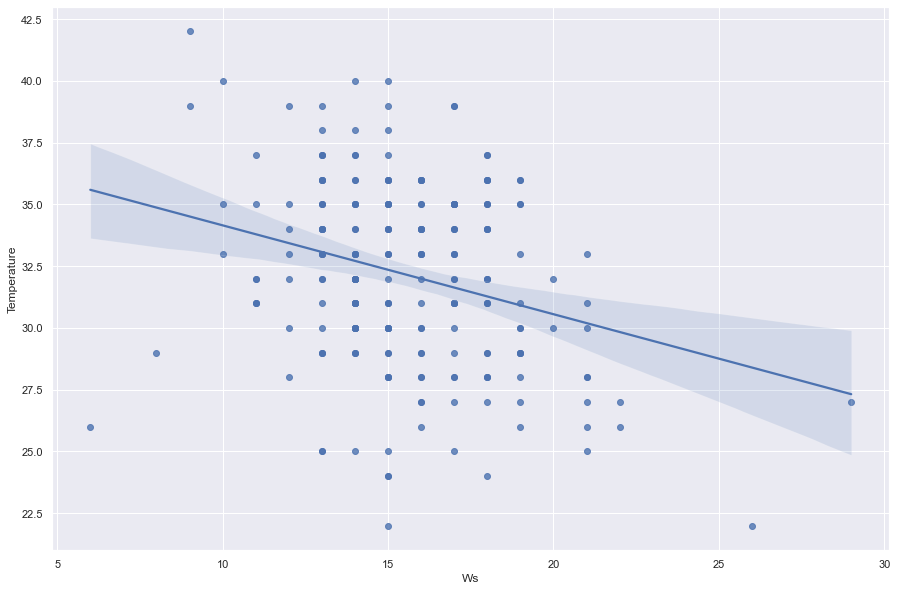

In [52]:
sns.regplot(x='Ws',y='Temperature',data=df)

# Rain vs Temperature


<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

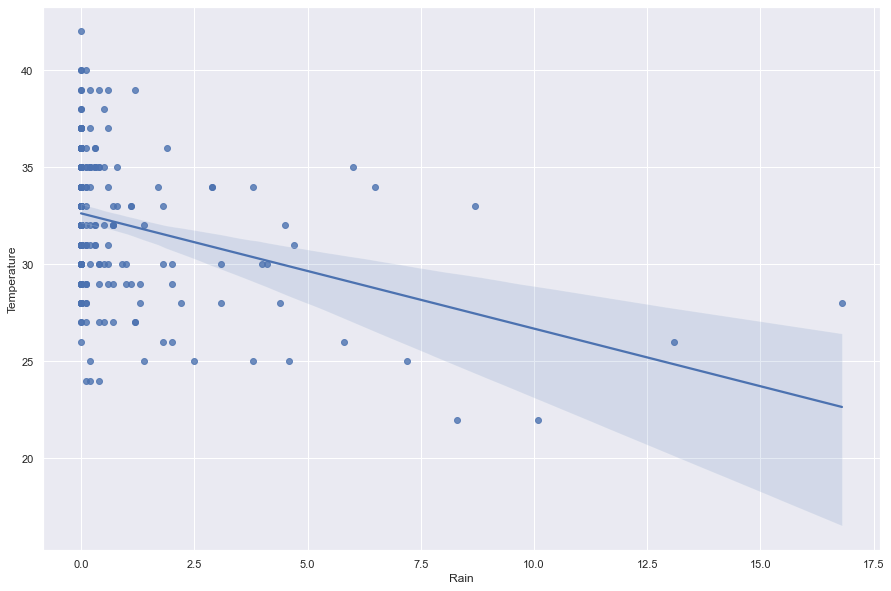

In [53]:
sns.regplot(x='Rain',y='Temperature',data=df)

# FFMC vs temperature

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

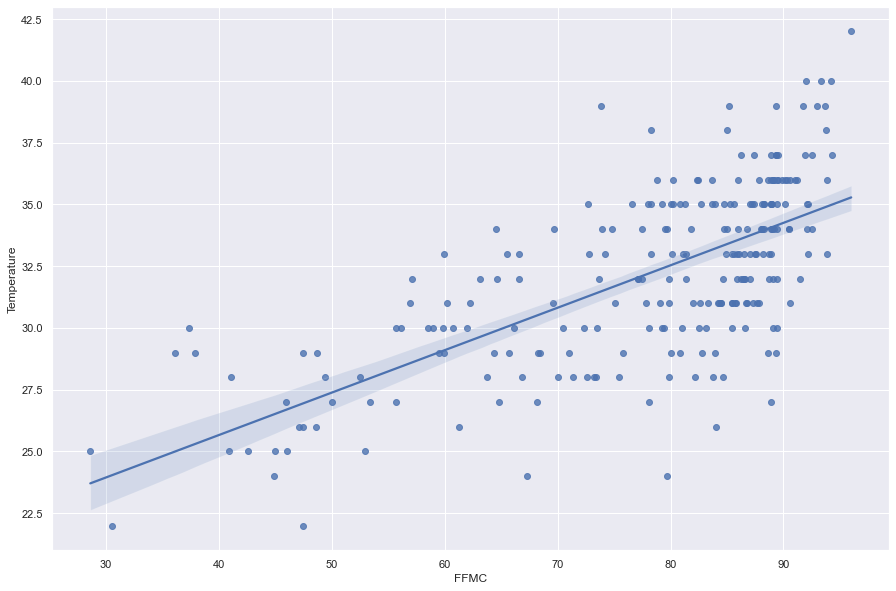

In [54]:
sns.regplot(x='FFMC',y='Temperature',data=df)

# DMC vs Temperature

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

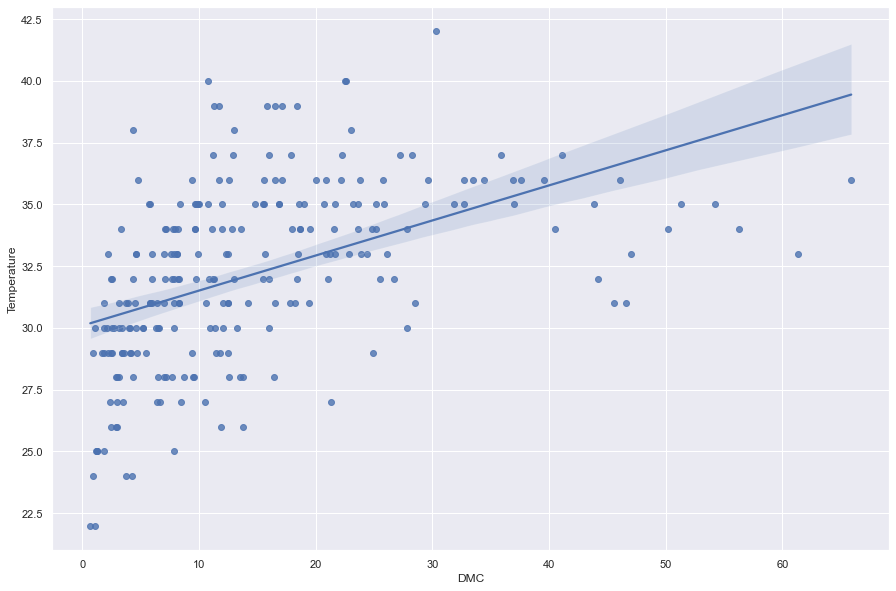

In [55]:
sns.regplot(x='DMC',y='Temperature',data=df)

# dc vs temperature

<AxesSubplot:xlabel='DC', ylabel='Temperature'>

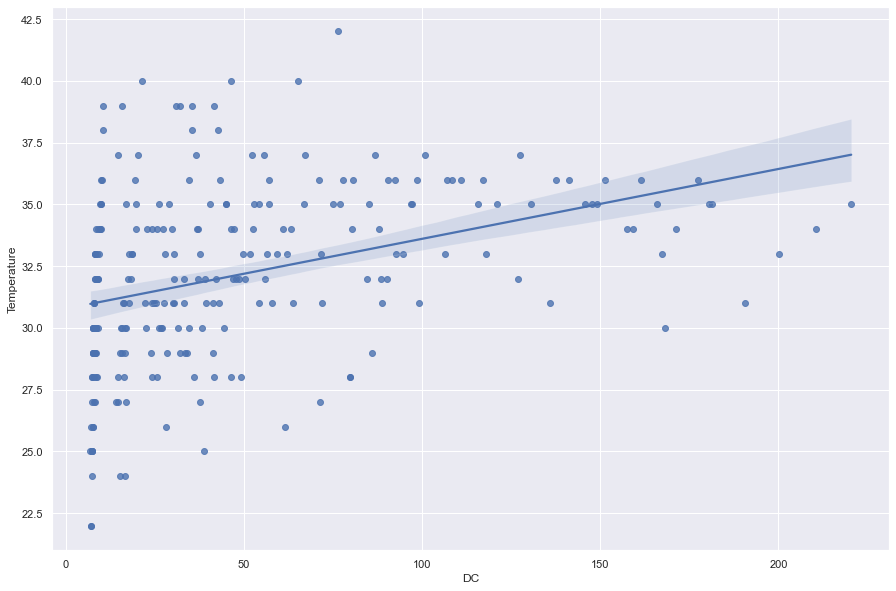

In [56]:
sns.regplot(x='DC',y='Temperature',data=df)

# ISI vs temperature


<AxesSubplot:xlabel='ISI', ylabel='Temperature'>

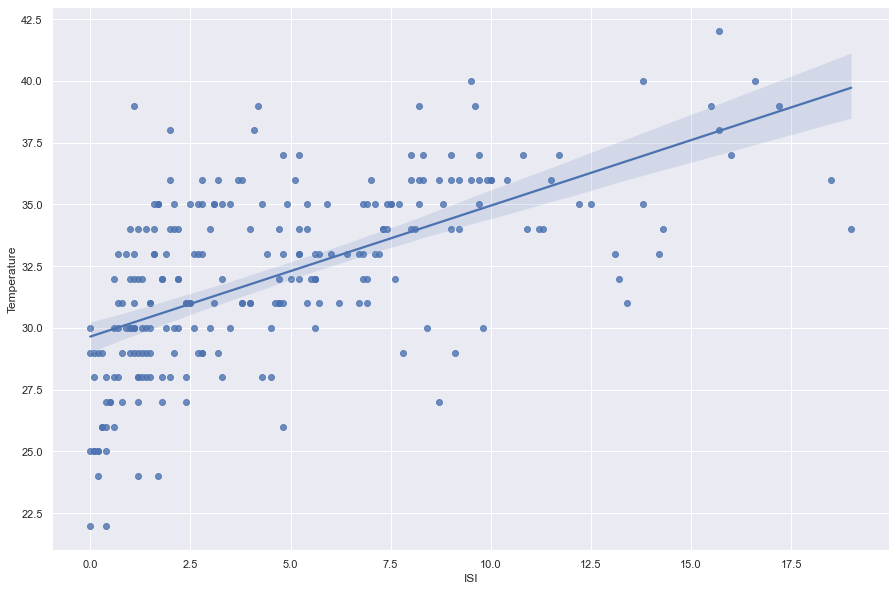

In [57]:
sns.regplot(x='ISI',y='Temperature',data=df)

# BUI vs Temperature

<AxesSubplot:xlabel='BUI', ylabel='Temperature'>

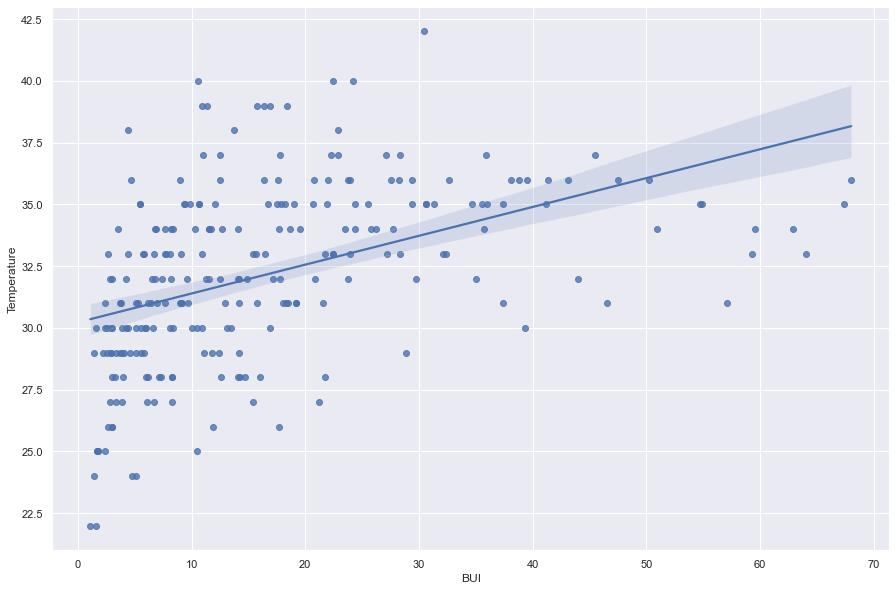

In [58]:
sns.regplot(x='BUI',y='Temperature',data=df)

# FWI vs Temperature

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

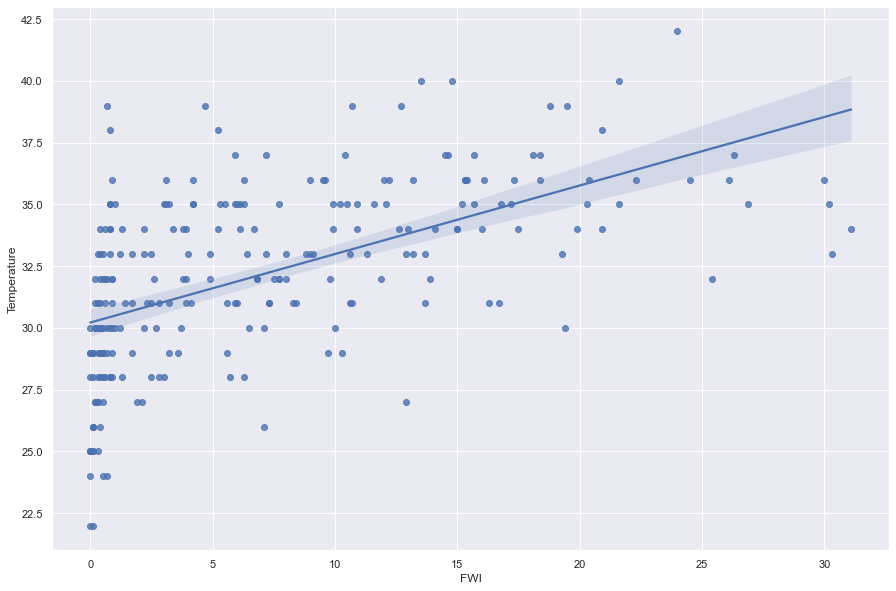

In [59]:
sns.regplot(x='FWI',y='Temperature',data=df)

# Classes vs temperature


<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

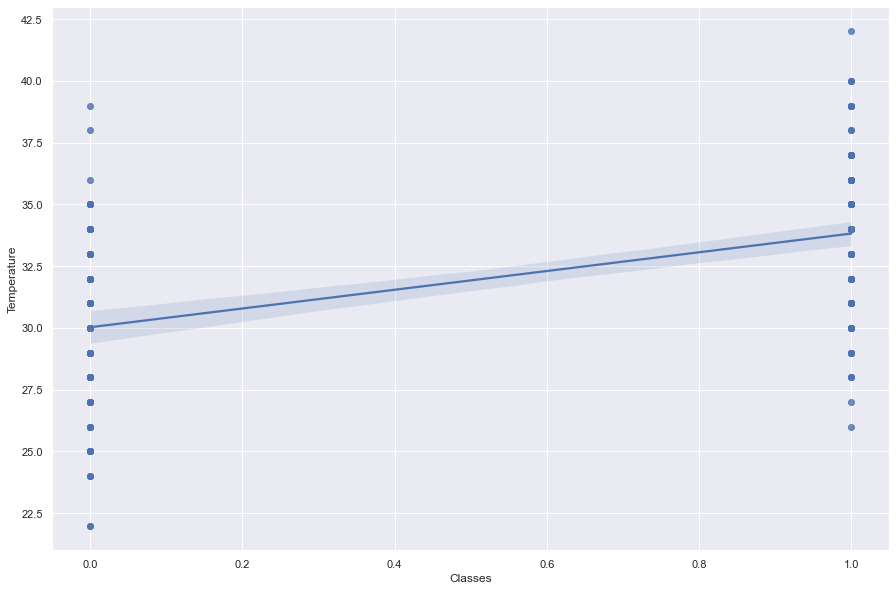

In [60]:
sns.regplot(x='Classes',y='Temperature',data=df)

# Region vs Temperature

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

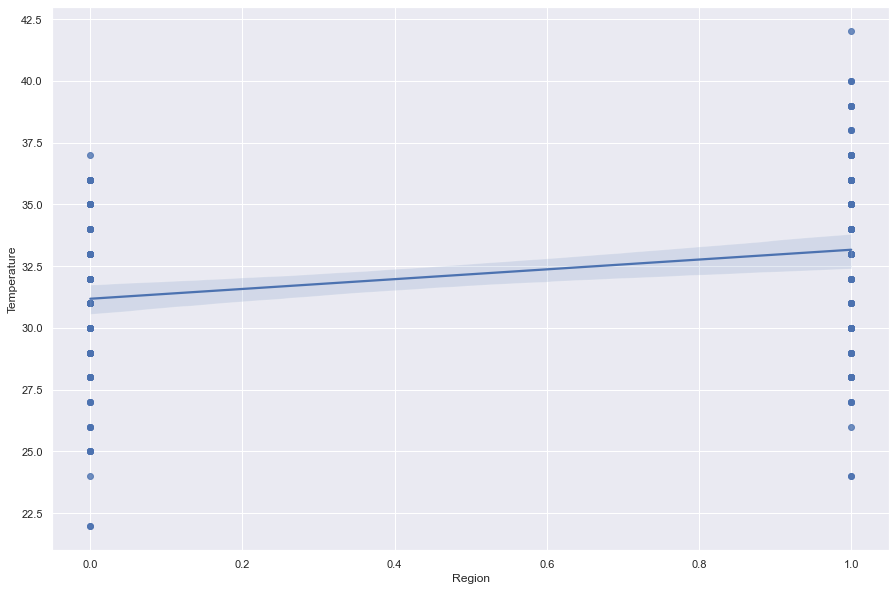

In [61]:
sns.regplot(x='Region',y='Temperature',data=df)

In [62]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05


# Independent and Dependent feature seperation

Independent feature

In [63]:
X=df.iloc[:,1:-1]

In [64]:
X.head(10)

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


# Dependent feature

In [65]:
Y=df.iloc[:,0]

In [66]:
Y.head(10)

0    29
1    29
2    26
3    25
4    27
5    31
6    33
7    30
8    25
9    28
Name: Temperature, dtype: int32

# Spliting the data into train and test split

Spliting the data into train test split
It will return 4 different paremeters
Output feature of x train is y train and x test is Y test 
Test size = 0.25 if 1000 in 25% of data 
Random state 

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [69]:
X_train.shape

(163, 11)

In [70]:
Y_train.shape

(163,)

In [71]:
X_test.shape

(81, 11)

In [72]:
Y_test.shape

(81,)

# Standardizing or Feature scalling the dataset

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler


StandardScaler()

In [74]:
#Apply data

X_train = scaler.fit_transform(X_train)


In [77]:
X_test = scaler.transform(X_test)


data leakage we dont need to leak the data of test to train data
avoid data leakage use transform example : is exam paper is x_train if you get before exam 
is called parer leakage f to f' we convert mean and std in fit and transform 


In [78]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [ 0.14460201, -0.93856657, -0.39436188, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-1.41768313,  2.04653297, -0.39436188, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [79]:
X_test 

array([[-4.26534336, -5.86110456, -0.57089371, -5.19901219, -1.15431769,
        -0.98687211, -1.02091533, -1.1285069 , -0.88356799,  0.87373921,
        -2.98168861],
       [-4.31148201, -6.13956766, -0.57089371, -5.1920137 , -1.18113413,
        -1.00057408, -0.98047204, -1.16338672, -0.90594809,  0.87373921,
        -2.98168861],
       [-4.33916521, -5.72187301, -0.57089371, -5.1948131 , -1.19360689,
        -1.00579976, -0.95736159, -1.17799854, -0.92086815,  0.87373921,
         1.01846194],
       [-4.31609588, -5.58264146, -0.47070329, -5.22933899, -1.11378121,
        -0.95173251, -1.19424371, -1.07053098, -0.93019319,  0.87373921,
         1.01846194],
       [-4.37146227, -6.55726232, -0.55085562, -5.17428419, -1.10193208,
        -0.9863372 , -0.80136605, -1.10069731, -0.76420749,  0.87373921,
         1.01846194],
       [-4.26534336, -6.69649387, -0.3304367 , -5.25919922, -1.16990864,
        -1.00658155, -1.28668551, -1.16102998, -1.0271736 , -3.13365144,
         1.018

# Model Training


In [80]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression


LinearRegression()

In [81]:
regression.fit(X_train,Y_train)


LinearRegression()

# Coefficient and Intercept

In [82]:
print(regression.coef_)


[-1.05126674 -0.48159084  0.11938767  1.82417191  0.94467874  0.67540664
  0.17325427 -1.25422021  0.0537007  -0.23927078 -0.00511072]


In [83]:
print(regression.intercept_)

31.98159509202454


# Prediction

In [84]:
reg_pred = regression.predict(X_test)
reg_pred


array([28.97646225, 29.18680282, 28.99541408, 28.78868718, 29.50975862,
       30.19509527, 29.14783316, 29.57287851, 29.89840639, 29.85589291,
       29.30278209, 29.97811549, 30.18330691, 30.17671889, 28.88485361,
       28.86344202, 29.3699333 , 29.47469893, 28.99130391, 29.06428956,
       29.64573189, 29.51942778, 29.35764675, 29.39624387, 29.28851297,
       29.44515507, 29.00224306, 28.98580708, 28.91086433, 28.96133672,
       29.30117529, 30.02247078, 28.79229219, 28.85659358, 29.82381226,
       29.9875895 , 29.48852333, 29.14495156, 30.24166383, 28.47753479,
       29.09702824, 29.2268728 , 29.63946294, 29.28142968, 29.33091901,
       28.89099029, 28.73017729, 29.80249908, 29.08844055, 29.19339593,
       29.19879686, 28.77344883, 28.71670264, 29.09988631, 28.82648733,
       28.68588912, 29.16464485, 29.66348425, 29.5552388 , 29.32981935,
       28.83334353, 29.47938671, 28.99850611, 28.9483665 , 29.64126083,
       29.08796273, 28.89009065, 28.64494268, 29.2371978 , 28.95

# Assumption of Linear Regression


Assumption of linear regression
we used to check model is good or not

1. Linear relation between y test and

2. Residuals we get normal distribution

3. Get uniform distribution

# 1. linear relationship between Y_test and reg_prediction

Text(0, 0.5, 'test predicted data')

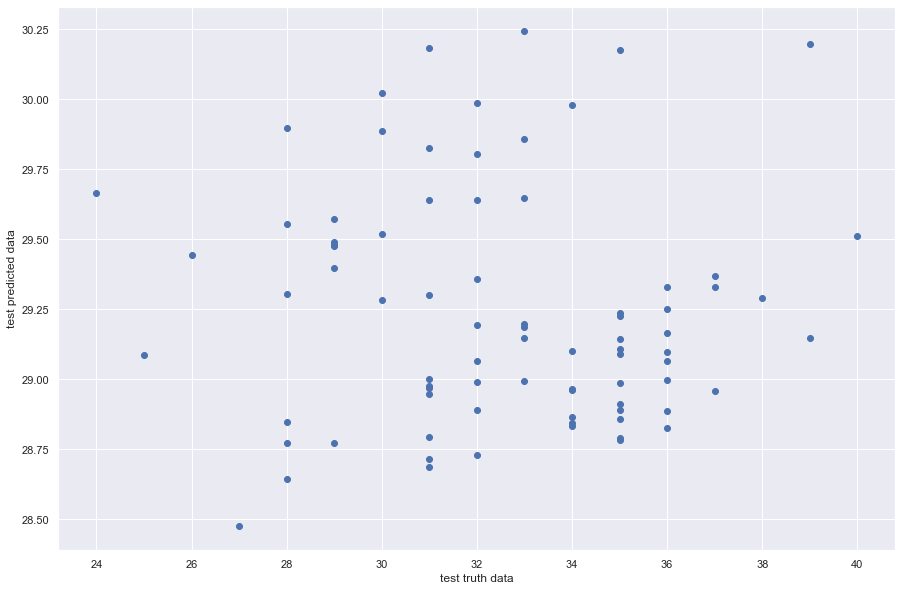

In [85]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")

# 2. Residual we get normal distribution


In [86]:
residuals = Y_test - reg_pred
residuals


24      2.023538
6       3.813197
153     4.004586
211     6.211313
198    10.490241
         ...    
180     5.035829
5       2.032112
56      6.750313
125     0.114047
148     6.934277
Name: Temperature, Length: 81, dtype: float64

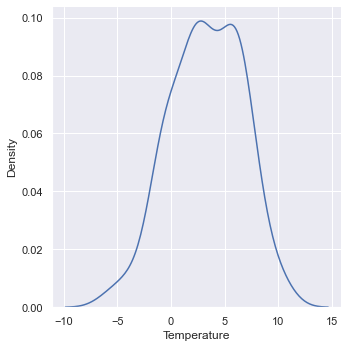

In [87]:
sns.displot(residuals,kind='kde')


# 3.Uniform Distribution

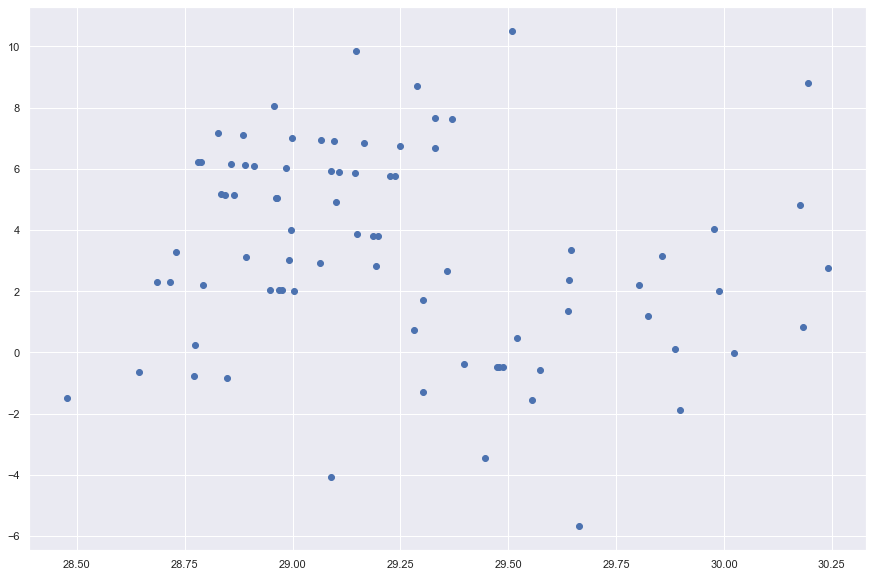

In [88]:
plt.scatter(reg_pred,residuals)


# Mean Squared Error(MSE), Mean Absolute Error(MAE), Root Mean Square Error(RMSE)

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))


22.032785614668985
3.9079385688586883
4.693909416964604


# Performance Metrics

# R Squared


In [90]:
from sklearn.metrics import r2_score
linear_score = r2_score(Y_test,reg_pred)
print(linear_score)

-1.0513283158484912


# Adjusted R Squared


In [91]:
1 - (1-linear_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-1.378351670548975

# Ridge Regression

# Train the Model


In [92]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,Y_train)


Ridge(alpha=0.99)

# Coefficient and Intercept

In [93]:
print(ridgeR.coef_)


[-1.0603827  -0.48247028  0.103006    1.76997509  0.44896271  0.43633654
  0.2171534  -0.49095187 -0.01457222 -0.22989405  0.00997644]


In [94]:
print(ridgeR.intercept_)

31.98159509202454


# Prediction


In [95]:
ridgeR_pred = ridgeR.predict(X_test)
ridgeR_pred

array([29.23712746, 29.44100401, 29.30831558, 29.12125343, 29.82730473,
       30.46434675, 29.46085223, 29.84182666, 30.11878013, 30.06384566,
       29.51575144, 30.26559662, 30.3954006 , 30.4490213 , 29.16124519,
       29.17360296, 29.68758907, 29.68996663, 29.243863  , 29.37498356,
       29.859382  , 29.73473142, 29.61387002, 29.60688466, 29.60982036,
       29.65375787, 29.25999432, 29.24966516, 29.20121111, 29.27686246,
       29.55850499, 30.28172294, 29.05225585, 29.12999308, 30.03726524,
       30.19718933, 29.70373673, 29.45992126, 30.48574467, 28.74893971,
       29.36218074, 29.53862417, 29.85559796, 29.49603148, 29.64568088,
       29.14489427, 29.03925718, 30.01054499, 29.40204078, 29.5099333 ,
       29.51895199, 29.02601057, 29.02627752, 29.37797437, 29.09637202,
       28.96658439, 29.48600109, 29.93597558, 29.82128473, 29.64890508,
       29.14724025, 29.69048473, 29.31017698, 29.2596499 , 29.85960915,
       29.28842226, 29.14905287, 28.90007879, 29.5595994 , 29.27

# Assumptions for Ridge Regression

# 1.linear relationship between Y_test and predicted Y

Text(0, 0.5, 'test predicted data')

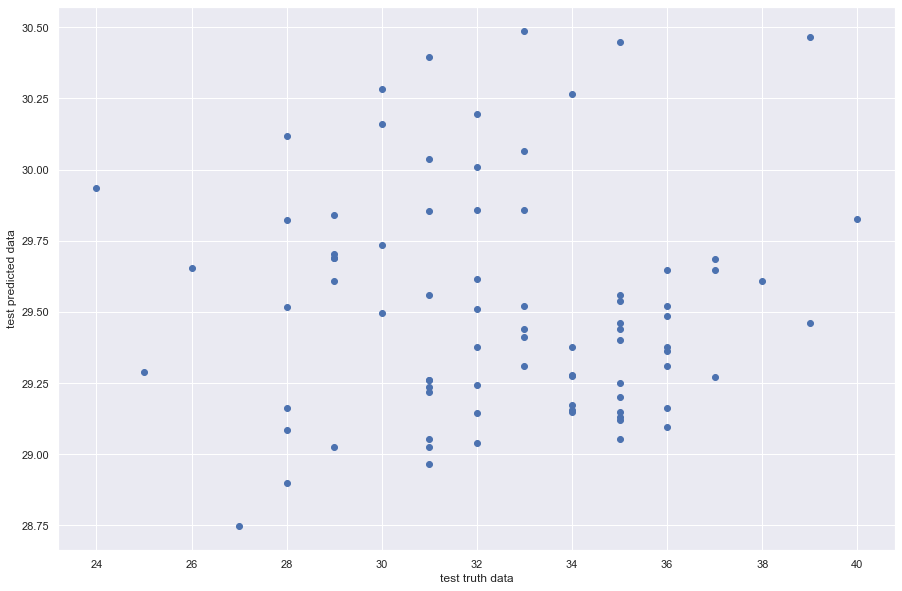

In [96]:
plt.scatter(Y_test,ridgeR_pred)
plt.xlabel("test truth data")
plt.ylabel("test predicted data")


# 2.residual we get normal distribution

In [97]:
residuals= Y_test-ridgeR_pred
residuals


24      1.762873
6       3.558996
153     3.691684
211     5.878747
198    10.172695
         ...    
180     4.724385
5       1.780089
56      6.480012
125    -0.158800
148     6.621942
Name: Temperature, Length: 81, dtype: float64

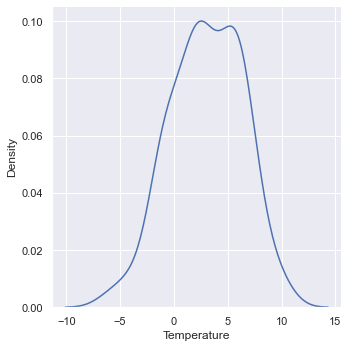

In [98]:
sns.displot(residuals,kind='kde')

# 3.Uniform distribution

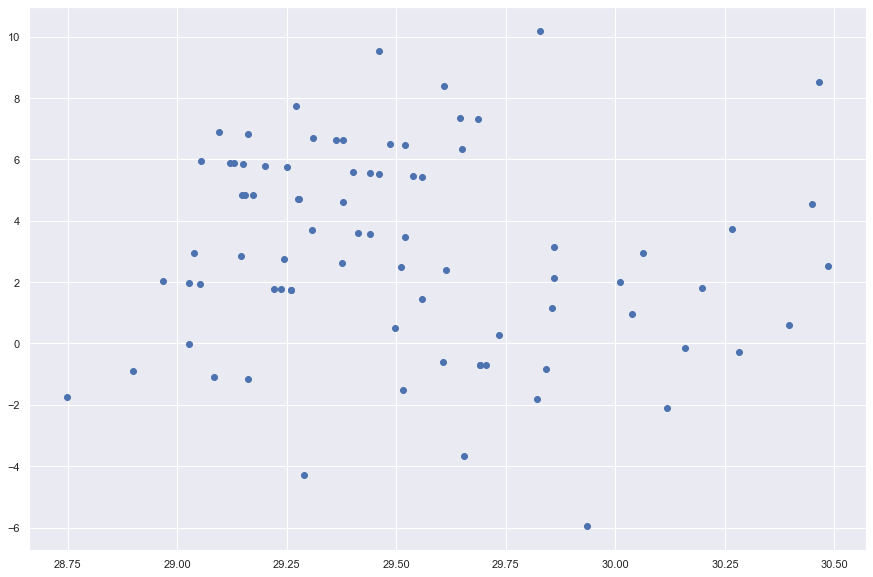

In [99]:
plt.scatter(ridgeR_pred,residuals)

# Performance Metrics

# MSE, MAE, RMSE

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridgeR_pred))
print(mean_absolute_error(Y_test,ridgeR_pred))
print(np.sqrt(mean_squared_error(Y_test,ridgeR_pred)))

20.147414453692544
3.7368807860443356
4.488587133351936


# R Square

In [101]:
from sklearn.metrics import r2_score
ridgeR_score = r2_score(Y_test,ridgeR_pred)
print(ridgeR_score)


-0.8757937594817193


# Adjusted R Squared

In [102]:
1-(1-ridgeR_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-1.1748333443266312

# Lasso Regression

# Train the mode

In [103]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.05)

# Coefficient and Intercept

In [104]:
print(lasso.coef_)


[-1.14351042 -0.38959936  0.          1.60766408  0.19021954  0.1505428
  0.01479416  0.          0.         -0.          0.        ]


In [105]:
print(lasso.intercept_)


31.98159509202454


# Prediction

In [106]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([30.40103323, 30.56696812, 30.42857273, 30.31226151, 30.84665159,
       30.61987517, 30.55471116, 30.0634984 , 30.37294529, 30.29335104,
       29.89130512, 30.49093264, 30.62011248, 30.63063545, 30.33569093,
       30.30559864, 30.69070699, 29.97489904, 30.39161055, 30.48860174,
       30.15241614, 30.04141271, 30.71122249, 29.9406986 , 30.62497288,
       29.94609489, 30.42944174, 30.41574399, 30.27294375, 30.37609387,
       30.67585281, 30.42135691, 30.24467066, 30.32330522, 30.32606414,
       30.46079926, 30.0319271 , 30.5842159 , 30.50486156, 29.19354247,
       30.52648189, 30.63684323, 30.18268309, 29.82046707, 30.68860457,
       30.3193382 , 30.19309922, 30.26838252, 30.52065327, 30.59543052,
       30.59909931, 30.22674187, 30.17921056, 30.51245841, 30.27011451,
       30.20193387, 30.51907866, 30.22038032, 30.07711594, 30.71978032,
       30.27928841, 30.02384304, 30.41860869, 30.38330357, 30.17992334,
       29.59237955, 30.32549103, 30.10827295, 30.63347775, 30.39

# Assumptions of Lasso Regression

# 1.relationship between real y and predicted Y

Text(0, 0.5, 'test predict data')

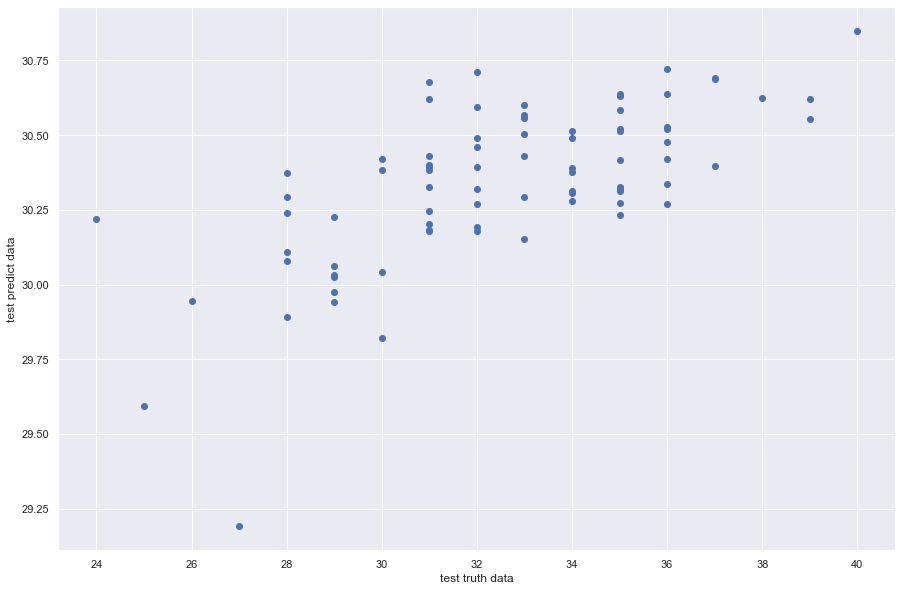

In [107]:
plt.scatter(Y_test,lasso_pred)
plt.xlabel("test truth data")
plt.ylabel("test predict data")

# 2. Residual

In [108]:
residuals = Y_test - lasso_pred
residuals


24     0.598967
6      2.433032
153    2.571427
211    4.687738
198    9.153348
         ...   
180    3.609618
5      0.606068
56     5.364235
125   -0.383856
148    5.524837
Name: Temperature, Length: 81, dtype: float64

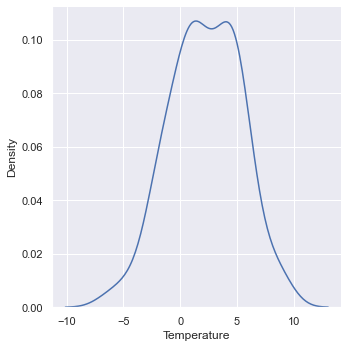

In [109]:
sns.displot(residuals,kind='kde')

# 3.To Get uniform distribution

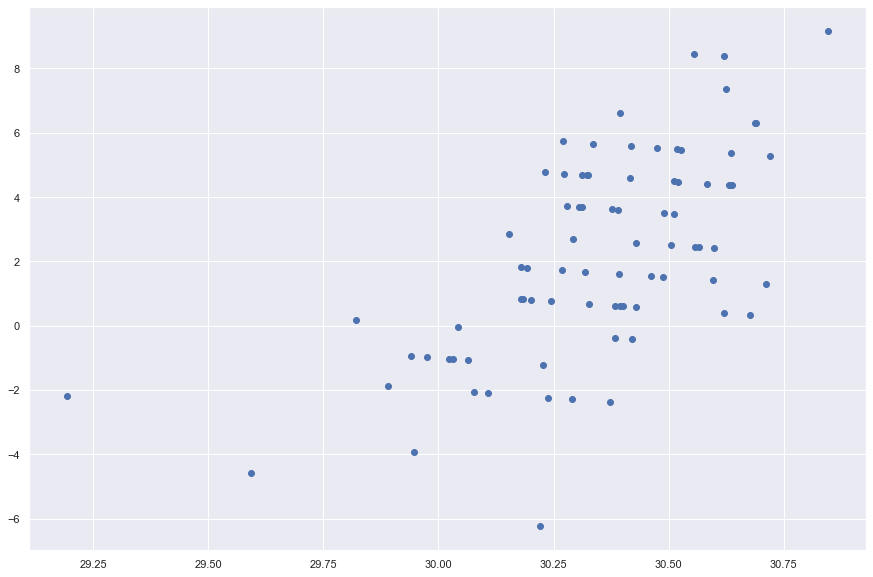

In [110]:
plt.scatter(lasso_pred,residuals)

# THANK YOU!